In [143]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, ifft

## 1. Création d'un signal à 2 fréquences avec bruit 

(0.0, 0.005)

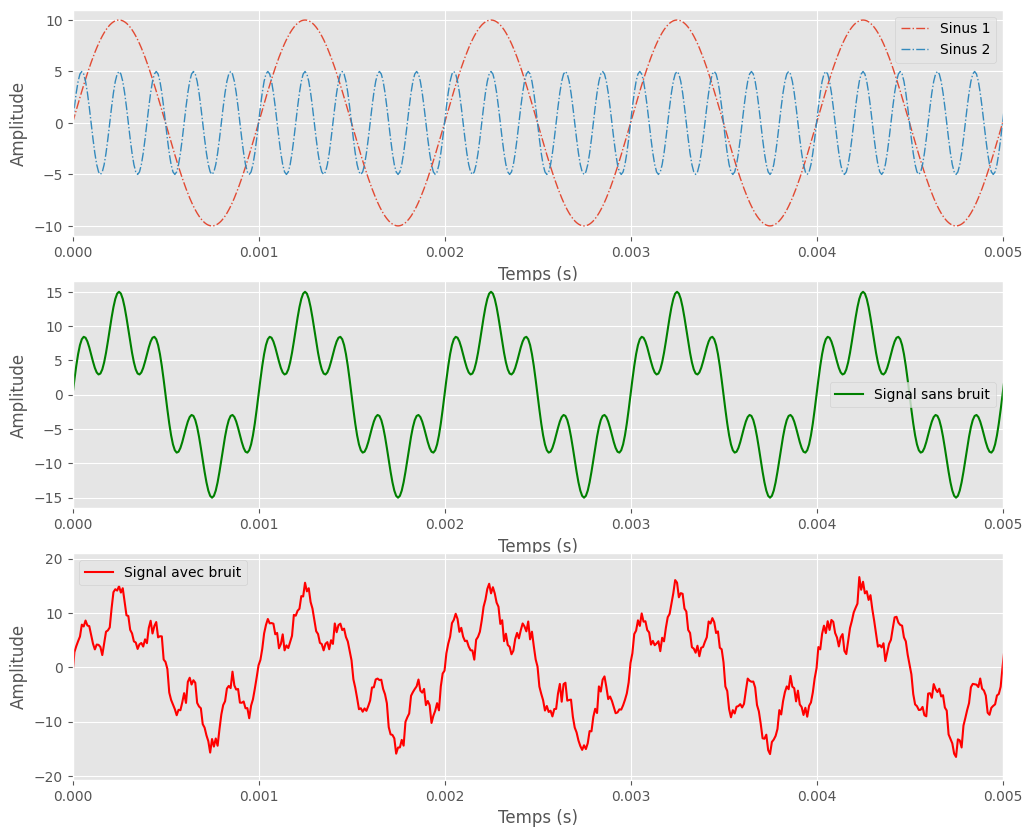

In [144]:
duration = 5
t = np.arange(0,5, 1e-5)

A1 = 10
A2 = 5

freq1 = 1000
freq2 = 5000

sin1 = A1*np.sin(2*np.pi*freq1*t)
sin2 = A2*np.sin(2*np.pi*freq2*t)

s_clean = sin1 + sin2
s_noise = np.copy(s_clean) + np.random.randn(len(s_clean))

plt.figure(figsize = (12,10))
plt.style.use("ggplot")
plt.subplot(3,1,1)
plt.plot(t, sin1, label ="Sinus 1", linestyle = "dashdot", linewidth = 1)
plt.plot(t, sin2, label ="Sinus 2", linestyle = "dashdot", linewidth = 1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([0,0.005])

plt.subplot(3,1,2)
plt.plot(t, s_clean, color = "green", label = "Signal sans bruit")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([0,0.005])

plt.subplot(3,1,3)
plt.plot(t, s_noise, color="red", label = "Signal avec bruit")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([0,0.005])

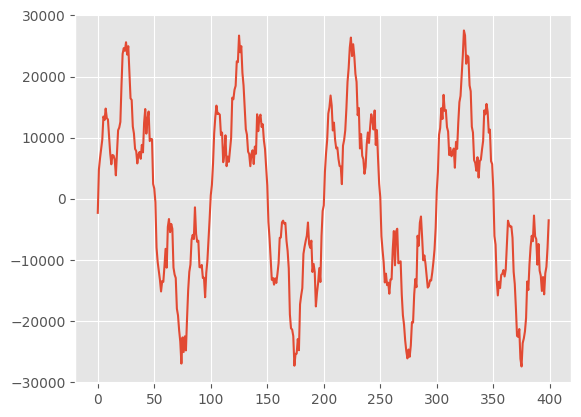

In [145]:
normalized_s = np.int16(s_noise/s_noise.max()*32767)
plt.plot(normalized_s[:400])

In [146]:
from scipy.io.wavfile import write 
write("my_sinus.wav", int(len(t)/duration), normalized_s)

## 2. Tranformée de Fourier du signal et élimination avec bruit 

In [147]:
from scipy.fft import rfft, rfftfreq

(0.0, 10000000.0)

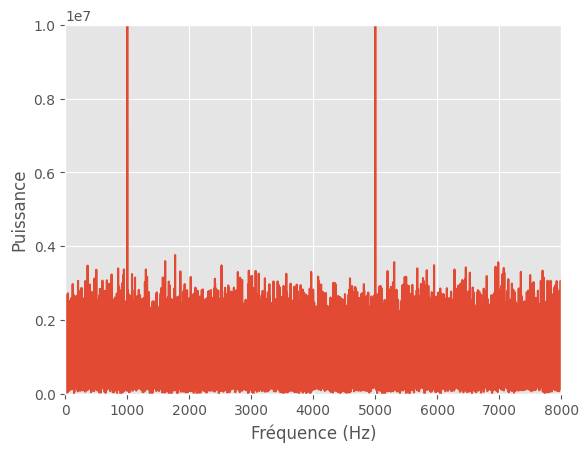

In [148]:
sampling_rate = int(len(t)/duration)
N = sampling_rate*duration
xf = rfftfreq(N, 1/sampling_rate)
yf = rfft(normalized_s)

plt.figure()
plt.plot(xf, np.abs(yf))
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Puissance")

plt.xlim([0, 8000])
plt.ylim([0,1e7])

In [149]:
indx = np.where((xf < freq1-1) | ((xf > freq1 + 1) & (xf < freq2 -1)) | (xf > freq2+1))
print(indx)

(array([     0,      1,      2, ..., 249998, 249999, 250000],
      shape=(249979,)),)


(0.0, 10000000.0)

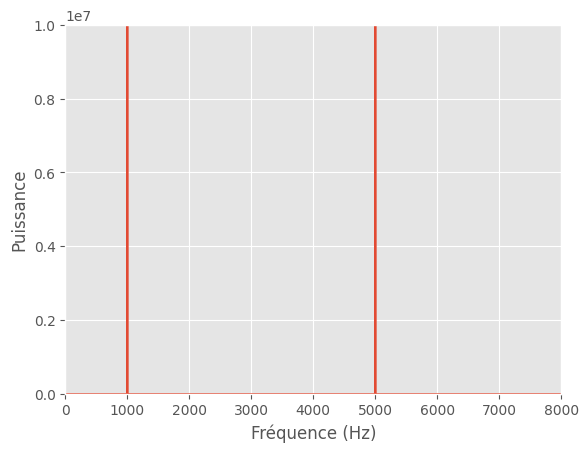

In [150]:
yf[indx] = 0 
plt.figure()
plt.plot(xf, np.abs(yf))
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Puissance")

plt.xlim([0, 8000])
plt.ylim([0,1e7])

## 3. Transformée inverse de Fourier

In [151]:
from scipy.fft import irfft

(0.0, 0.005)

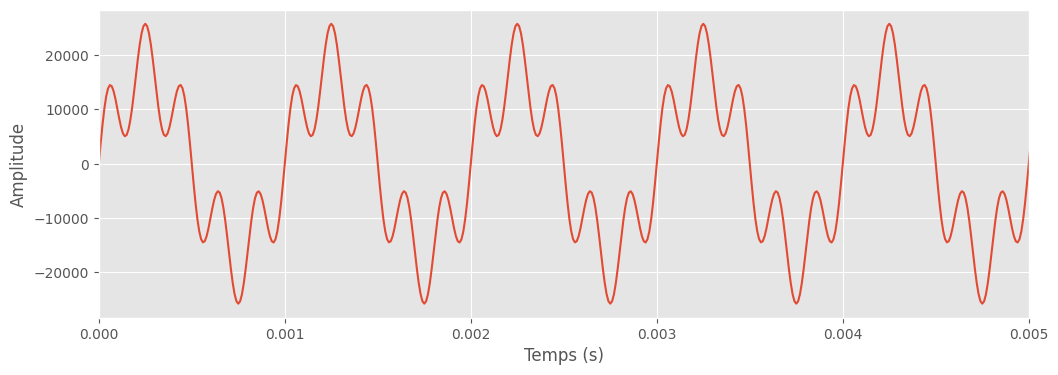

In [152]:
filtered_s = irfft(yf)

plt.figure(figsize =(12,4))
plt.plot(t, filtered_s)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.xlim([0, 0.005])

In [153]:
normalized_filtered_s = np.int16((filtered_s/filtered_s.max())*32767)
write("my_filtered_signal.wav", sampling_rate, normalized_filtered_s)